In [3]:
pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# 데이터 확인

In [2]:
book_list = []
for year in range(2022, 2012, -1):
    name = f'{year}_best.xlsx'
    book = pd.read_excel(name)
    book_list.append(book)
book_list[9]

,순위,상품코드,판매상품ID,상품명,정가,판매가,할인율,적립율,적립예정포인트,인물,출판사,발행(출시)일자,분야
0,1,9788995501443,S000001573833,꾸뻬씨의 행복여행,"15,000","13,500",10%,5%,750,프랑수아 를로르,오래된미래,20040728,소설
1,2,9788937487927,S000000621196,색채가 없는 다자키 쓰쿠루와 그가 순례를 떠난 해,"14,800","13,320",10%,5%,740,무라카미 하루키,민음사,20130701,소설
2,3,9788965744023,S000001025857,정글만리 1,"16,500","14,850",10%,5%,820,조정래,해냄출판사,20130701,소설
3,4,9788972756194,S000001123530,나미야 잡화점의 기적,"14,800","13,320",10%,5%,740,히가시노 게이고,현대문학,20121219,소설
4,5,9788965701200,S000001024416,김미경의 드림 온(Dream On),"7,500","6,750",10%,5%,370,김미경,쌤앤파커스,20130111,자기계발
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,9788959942589,S000000914107,영어패턴 500 플러스,"15,000","13,500",10%,5%,750,이광수 외,넥서스,20120425,외국어
175,176,9788982814471,S000001279906,연금술사,"12,000","10,800",10%,5%,600,파울로 코엘료,문학동네,20181205,소설
176,177,9788968222610,S000001053850,요츠바랑 12,"5,200","4,680",10%,5%,260,아즈마 키요히코,대원씨아이,20130425,만화
177,178,9788934962984,S000000596699,어제까지의 세계,"29,000","26,100",10%,5%,"1,450",재레드 다이아몬드,김영사,20130509,역사/문화


In [3]:
#데이터 합치기 (중복되는 header들 삭제 안했는데 자동으로 삭제됨)
book = pd.concat(book_list)
book[194:196]

,순위,상품코드,판매상품ID,상품명,정가,판매가,할인율,적립율,적립예정포인트,인물,출판사,발행(출시)일자,분야
194,195,9791191347975,S000061451366,우리는 어디서 살아야 하는가,"18,000","16,200",10%,5%,900,김시덕,포레스트북스,20220720,경제/경영
0,1,9791165341909,S000001835614,달러구트 꿈 백화점,"13,800","12,420",10%,5%,690,이미예,팩토리나인,20200708,소설


In [4]:
#갯수
len(book)

1837

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 178
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        1837 non-null   int64 
 1   상품코드      1837 non-null   int64 
 2   판매상품ID    1837 non-null   object
 3   상품명       1837 non-null   object
 4   정가        1837 non-null   object
 5   판매가       1837 non-null   object
 6   할인율       1837 non-null   object
 7   적립율       1837 non-null   object
 8   적립예정포인트   1837 non-null   object
 9   인물        1837 non-null   object
 10  출판사       1837 non-null   object
 11  발행(출시)일자  1837 non-null   int64 
 12  분야        1837 non-null   object
dtypes: int64(3), object(10)
memory usage: 200.9+ KB


# 전처리

## 결측치 확인

In [6]:
#결측치 여부 확인 : 없음
book.isna().sum()

순위          0
상품코드        0
판매상품ID      0
상품명         0
정가          0
판매가         0
할인율         0
적립율         0
적립예정포인트     0
인물          0
출판사         0
발행(출시)일자    0
분야          0
dtype: int64

## 전처리

In [7]:
# 칼럼삭제
book.drop(columns=['상품코드', '판매상품ID', '정가', '할인율', '적립율', '적립예정포인트'], inplace=True)
book[:2]

,순위,상품명,판매가,인물,출판사,발행(출시)일자,분야
0,1,불편한 편의점(벚꽃 에디션),"12,600",김호연,나무옆의자,20210420,소설
1,2,하얼빈,"14,400",김훈,문학동네,20220803,소설


In [8]:
#칼럼명 변경
book.rename(columns={'발행(출시)일자':'출시일자', '인물':'작가'}, inplace=True)
book[:2]

,순위,상품명,판매가,작가,출판사,출시일자,분야
0,1,불편한 편의점(벚꽃 에디션),"12,600",김호연,나무옆의자,20210420,소설
1,2,하얼빈,"14,400",김훈,문학동네,20220803,소설


In [9]:
#리스트 전처리
for idx in range(0, 10):
    book_list[idx].drop(columns=['상품코드', '판매상품ID', '정가', '할인율', '적립율', '적립예정포인트'], inplace=True)
    book_list[idx].rename(columns={'발행(출시)일자':'출시일자', '인물':'작가'}, inplace=True)
book_list[0]    

,순위,상품명,판매가,작가,출판사,출시일자,분야
0,1,불편한 편의점(벚꽃 에디션),"12,600",김호연,나무옆의자,20210420,소설
1,2,하얼빈,"14,400",김훈,문학동네,20220803,소설
2,3,그리움은 아무에게나 생기지 않습니다,"13,500",박근혜,가로세로연구소,20211230,정치/사회
3,4,작별인사,"12,600",김영하,복복서가,20220502,소설
4,5,부자 아빠 가난한 아빠 1(20주년 특별 기념판),"15,300",로버트 기요사키,민음인,20221028,경제/경영
...,...,...,...,...,...,...,...
190,191,가짜 모범생,"10,800",손현주,특별한서재,20211015,청소년
191,192,문재인의 위로,"14,220",더휴먼 편집부,더휴먼,20220510,시/에세이
192,193,고민의 답,"14,220",글배우,강한별,20220325,자기계발
193,194,마지막 몰입: 나를 넘어서는 힘,"15,120",짐 퀵,비즈니스북스,20210223,자기계발


## 파일 저장

In [10]:
book.to_csv('book.csv', index=False, encoding='utf-8')
print('저장완료')

저장완료


## 파일 읽어오기

In [11]:
book = pd.read_csv('book.csv')
book[:2]

,순위,상품명,판매가,작가,출판사,출시일자,분야
0,1,불편한 편의점(벚꽃 에디션),"12,600",김호연,나무옆의자,20210420,소설
1,2,하얼빈,"14,400",김훈,문학동네,20220803,소설


# 데이터 분석

In [12]:
#1. 10년 동안 베스트셀러에 2회 이상 오른 작품(작품명 기준): 7권
best_twice = book.value_counts(ascending=False)
best_ten_twice = best_twice[book.value_counts(ascending=False) >= 2]
best_ten_twice.to_frame()

,,,,,,,0
순위,상품명,판매가,작가,출판사,출시일자,분야,
41,원씽(The One Thing)(리커버 특별판),"12,600",게리 켈러 외,비즈니스북스,20130830,자기계발,2
76,나의 하루는 4시 30분에 시작된다,"13,500",김유진,토네이도,20211028,자기계발,2
4,설민석의 조선왕조실록,"19,800",설민석,세계사,20160720,역사/문화,2
53,코스모스,"17,910",칼 세이건,사이언스북스,20100120,과학,2
8,돌이킬 수 없는 약속,"13,500",야쿠마루 가쿠,북플라자,20170202,소설,2
156,백년 허리,"15,750",정선근,사이언스북스,20151231,건강,2
153,하루 5분 아빠 목소리,"14,400",정홍,위즈덤하우스,20141120,가정/육아,2


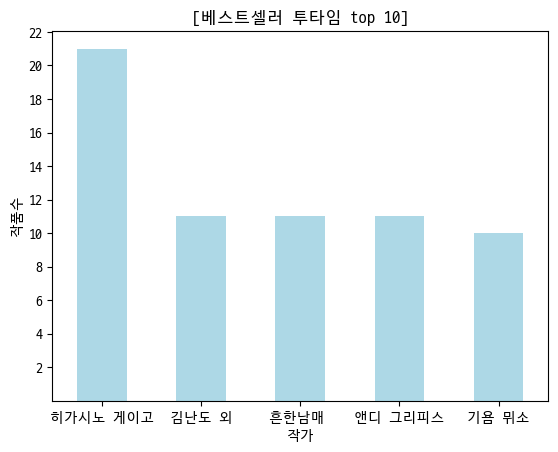

In [27]:
#2. 베스트셀러에 2회 이상 이름을 올린 '작가' 및 '분야' top5: 총 209명 중 1~5위
# 작가별&상품명별&분야별 갯수
author_book_genre = book.groupby(['작가', '상품명', '분야']).size().reset_index(name='갯수')

# 작가별&분야별로 상품명 갯수 많은 순서로 정렬
best_author_genre = author_book_genre.groupby(['작가', '분야']).size().reset_index(name='작품수').sort_values(by='작품수', ascending=False)

best_author_genre[:5]

#시각화
plt.rc('font', family='D2coding')
best_author_genre[:5].plot(kind='bar', 
                            x='작가',
                            y='작품수',
                            rot=0,
                            color='LightBlue'
                           )
plt.title('[베스트셀러 투타임 top 10]')
#           ,fontdict={'fontsize' : 16, 'fontweight' : 'bold'})
plt.yticks(range(2, 24, 2))
plt.ylabel('작품수')
plt.legend().remove()

plt.savefig('베스트셀러 투타임 top 10.png', dpi=200)

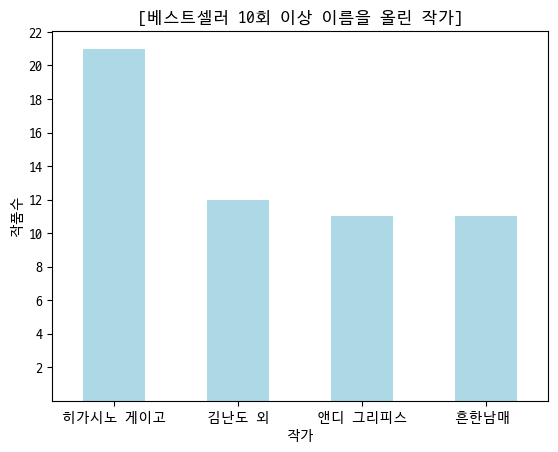

In [26]:
#3. 베스트셀러에 10회 이상 이름을 올린 작가: 4명 -작가사진 넣기
author_best_ten = author_book_genre.groupby('작가').size().reset_index(name='작품')
author_best_ten_seller = (author_best_ten[author_best_ten.작품 > 10]).sort_values(by='작품', ascending=False)
author_best_ten_seller

#시각화 (#2. 시각화와 그래프 모양은 동일)
author_best_ten_seller.plot(kind='bar',
                            x='작가',
                            y='작품',
                            color='LightBlue',                        
                            rot=0)
plt.title('[베스트셀러 10회 이상 이름을 올린 작가]')
#           ,fontdict={'fontsize' : 16, 'fontweight' : 'bold'})
plt.yticks(range(2, 24, 2))
plt.ylabel('작품수')
plt.legend().remove()

plt.savefig('베스트셀러에 10회 이상 이름올린 작가.png', dpi=200)

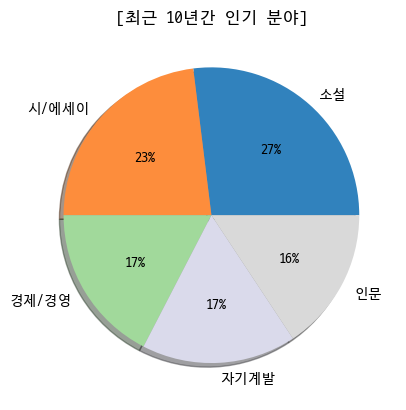

In [15]:
#4. 베스트셀러의 분야 top5: 소설, 시/에세이, 경영/경제, 자기계발, 인문
best_genre = (book.분야.value_counts())[:5]

#시각화
best_genre.plot(kind='pie', 
                    title = '[최근 10년간 인기 분야]',
                    autopct='%.f%%',
                    colormap='tab20c',
                    shadow=True,
                    rot=0,
                    )
plt.legend().remove()
plt.gca().axes.yaxis.set_visible(False)

plt.savefig('분야별 top5.png', dpi=200)

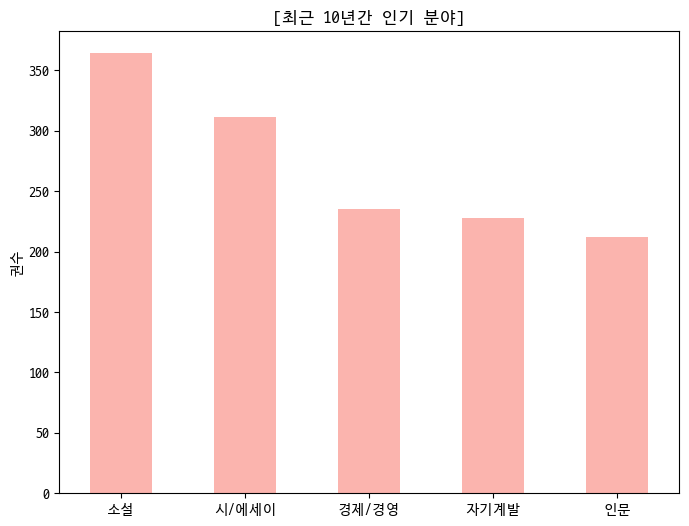

In [16]:
#bar모양 시각화
plt.figure(figsize=(8,6))

best_genre.plot(kind='bar', rot=0, colormap='Pastel1')
plt.title('[최근 10년간 인기 분야]')
# plt.xlabel('분야')
plt.ylabel('권수')

plt.savefig('분야별 top5(2).png', dpi=200)

In [17]:
# 💎💎💎💎💎 6번 💎💎💎💎💎

In [18]:
#######################################  6번  ################################
#6. 10년 동안 "2회 이상 top10"안에 들었던 적이 있는 작품: 총100개 중 2개
book_ten_steady_list = []
for idx in range(0, 10):
    book_s = book_list[idx][(book.순위 > 0) & (book.순위 <= 10)]
    book_ten_steady_list.append(book_s)
book_ten_steady = pd.concat(book_ten_steady_list)  
book_ten_steady[9:11]

# 2회 이상 top10
book_top10_twice = (book_ten_steady.value_counts(ascending=False)) >= 2
book_ten_steady.value_counts()[book_top10_twice].to_frame()

,,,,,,,0
순위,상품명,판매가,작가,출판사,출시일자,분야,
8,돌이킬 수 없는 약속,"13,500",야쿠마루 가쿠,북플라자,20170202,소설,2
4,설민석의 조선왕조실록,"19,800",설민석,세계사,20160720,역사/문화,2


<!-- 💎💎💎💎💎 5번 💎💎💎💎💎 -->

In [19]:
# 💎💎💎💎💎 5번 💎💎💎💎💎

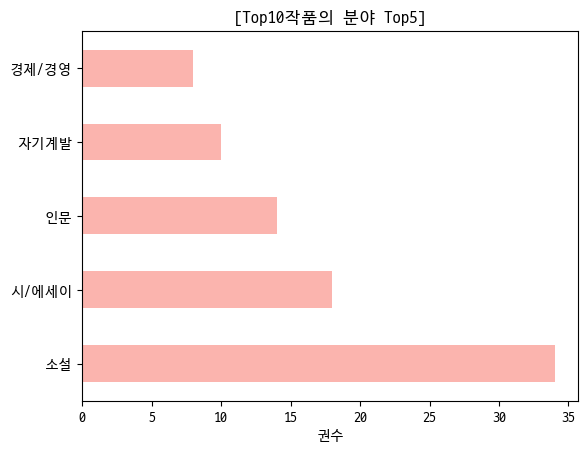

In [20]:
#5. 10년 간 "top10"안에 든 작품들의 분야 Top5(분야기준): 소설>시/에세이>인문>자기계발>경제/경영  - 상품명/작가 넣으면 될 듯
genre_top10 = book_ten_steady.분야.value_counts(ascending=False)[:5]

#시각화 barh
genre_top10.plot(kind='barh', rot=0, colormap='Pastel1')
plt.title('[Top10작품의 분야 Top5]')
plt.xlabel('권수')
# plt.ylabel('분야')

plt.savefig('Top10작품의 분야 Top5(2).png', dpi=200)

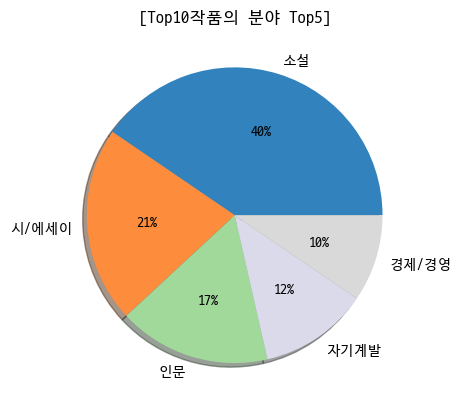

In [21]:
# 5번 시각화 pie
genre_top10.plot(kind='pie', 
                    title = '[Top10작품의 분야 Top5]',
                    autopct='%.f%%',
                    colormap='tab20c',
                    shadow=True,
                    rot=0,
                    )
plt.legend().remove()
plt.gca().axes.yaxis.set_visible(False)

plt.savefig('Top10작품의 분야 Top5.png', dpi=200)

In [22]:
#7. 출시일자가 10년 이상 경과했고 2022년에도 베스트셀러/작가: 8권(중복작가/작품 없음)  -- (보류)
book_steady_2022 = book_list[0][book_list[0].출시일자 < 20130601]
book_steady_2022

,순위,상품명,판매가,작가,출판사,출시일자,분야
29,30,인간 실격,"8,100",다자이 오사무,민음사,20120410,소설
62,63,코스모스,"17,910",칼 세이건,사이언스북스,20100120,과학
72,73,총 균 쇠,"25,200",재레드 다이아몬드,문학사상,20051219,역사/문화
78,79,모순,"11,700",양귀자,쓰다,20130401,소설
82,83,데미안,"7,200",헤르만 헤세,민음사,20090120,소설
109,110,시크릿,"15,120",론다 번,살림Biz,20070618,자기계발
124,125,클루지,"12,420",개리 마커스,갤리온,20081124,인문
131,132,나미야 잡화점의 기적,"13,320",히가시노 게이고,현대문학,20121219,소설


In [23]:
#8. 출시일자가 10년 이상 경과했고 2022년에도 베스트셀러인 작품들의 분야 순위  -- (보류)
book_steady_2022_genre = book_steady_2022.분야.value_counts()
book_steady_2022_genre

소설       4
과학       1
역사/문화    1
자기계발     1
인문       1
Name: 분야, dtype: int64

---

---

In [23]:
# # 연도별 1위 분야
# book_genre_list = []
# for idx in range(0, 10):
#     books = book_list[idx].groupby('분야').size().sort_values(ascending=False).index[0]
#     book_genre_list.append(books)
# book_genre_list

In [24]:
# book_genre_list = []
# for idx in range(0, 10):
#     books = book_list[idx].groupby('분야').size().sort_values(ascending=False)
#     book_genre_list.append(books)
# book_genre_list[0].index[0]